<a href="https://colab.research.google.com/github/ninaaulia/customer_segmentation/blob/main/rfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**

#  *B. RFM analysis & Clustering*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import re


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



sns.set()

In [ ]:
df = pd.read_csv('online.csv')

In [ ]:
# create new column to calculate total price 
df['totalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2.10
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,17.85


In [ ]:
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,totalPrice
count,70864.000000,70864.000000,70864.000000,70864.00000,70864.000000
mean,560639.843136,11.511233,3.063033,15552.19790,19.874129
std,13176.494003,41.017582,31.894970,1595.50593,78.123349
min,536365.000000,1.000000,0.001000,12747.00000,0.001000
25%,549128.000000,2.000000,1.250000,14194.00000,4.160000
50%,562012.500000,4.000000,1.950000,15525.00000,10.200000
75%,572283.000000,12.000000,3.750000,16931.00000,17.700000
max,581586.000000,4300.000000,8142.750000,18287.00000,8142.750000


In [ ]:
df.describe(include = 'object')

,StockCode,Description,InvoiceDate,Country
count,70864,70864,70864,70864
unique,3227,3352,13140,1
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00,United Kingdom
freq,381,381,128,70864


In [ ]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]') # convert datatype 'InvoiceDate' to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null datetime64[ns]
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
totalPrice     70864 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 4.9+ MB


In [ ]:
df.shape

(70864, 9)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
totalPrice     0
dtype: int64

In [ ]:
df.duplicated().sum()

239

In [ ]:
df[df.duplicated()].tail(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice
70787,580520,23295,SET OF 12 MINI LOAF BAKING CASES,1,2011-12-04 14:55:00,0.83,13521,United Kingdom,0.83


In [ ]:
df[(df['CustomerID'] == 13521) | (df['CustomerID'] == 13521)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice
144,579472,22144,CHRISTMAS CRAFT LITTLE FRIENDS,1,2011-11-29 15:09:00,2.10,13521,United Kingdom,2.10
506,581405,22402,MAGNETS PACK OF 4 VINTAGE COLLAGE,2,2011-12-08 13:50:00,0.39,13521,United Kingdom,0.78
1797,581405,23368,SET 12 COLOUR PENCILS DOLLY GIRL,1,2011-12-08 13:50:00,0.65,13521,United Kingdom,0.65
1804,579472,21818,GLITTER HEART DECORATION,1,2011-11-29 15:09:00,0.39,13521,United Kingdom,0.39
3461,581405,23100,SILVER BELLS TABLE DECORATION,2,2011-12-08 13:50:00,1.25,13521,United Kingdom,2.50
...,...,...,...,...,...,...,...,...,...
66727,581405,22621,TRADITIONAL KNITTING NANCY,2,2011-12-08 13:50:00,1.65,13521,United Kingdom,3.30
67212,581405,21115,ROSE CARAVAN DOORSTOP,1,2011-12-08 13:50:00,1.95,13521,United Kingdom,1.95
69573,581405,22551,PLASTERS IN TIN SPACEBOY,1,2011-12-08 13:50:00,1.65,13521,United Kingdom,1.65
69619,579472,85059,FRENCH ENAMEL WATER BASIN,1,2011-11-29 15:09:00,3.75,13521,United Kingdom,3.75


kita tidak perlu menghapus data duplikasi karna data duplikasi tersebut merupakan data pembelian ulang customer

## EDA

## Total customers per month

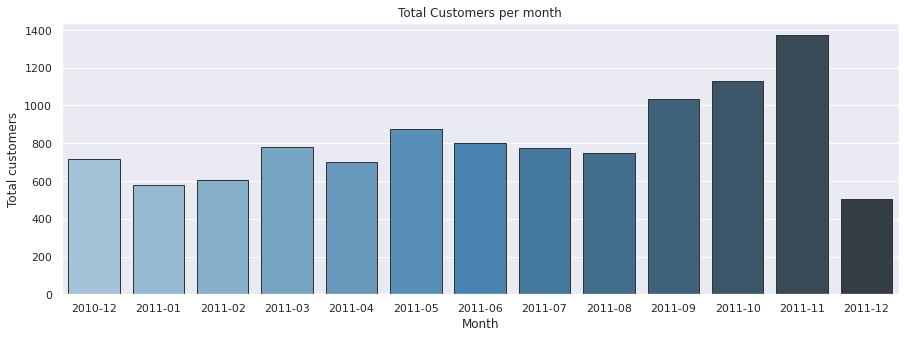

In [ ]:
# create new column for year and month
df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
# df['month_year']
total_cust = df['CustomerID'].groupby(df['month_year']).nunique()

#plot
plt.figure(figsize=(15,5))
sns.barplot(x=total_cust.index, y=total_cust.values, data=df,  palette= 'Blues_d', errcolor='.2', edgecolor='.2')
plt.title('Total Customers per month')
plt.xlabel('Month')
plt.ylabel('Total customers')
plt.show()

## Total orders per month

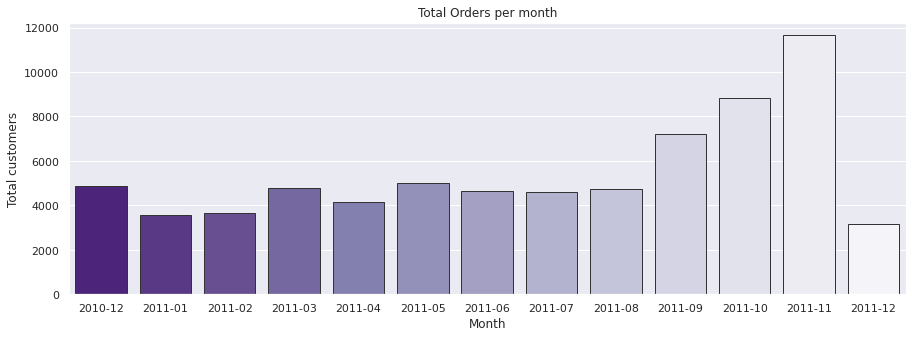

In [ ]:
total_orders = df['InvoiceNo'].groupby(df['month_year']).count()

#plot
plt.figure(figsize=(15,5))
sns.barplot(x=total_orders.index, y=total_orders.values, data=df,  palette= 'Purples_r', errcolor=".2", edgecolor=".2")
plt.title('Total Orders per month')
plt.xlabel('Month')
plt.ylabel('Total customers')
plt.show()

## Total income per month

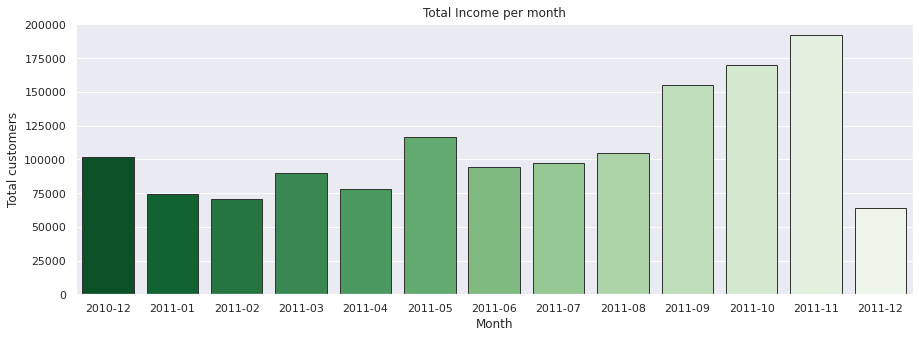

In [ ]:
income = df['totalPrice'].groupby(df['month_year']).sum()


#plot
plt.figure(figsize=(15,5))
sns.barplot(x=income.index, y=income.values, data=df,  palette= 'Greens_r', edgecolor='.2')
plt.title('Total Income per month')
plt.xlabel('Month')
plt.ylabel('Total customers')
plt.show()

## Create RFM

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [ ]:
# PRESENT for analysis recently
# PRESENT = dt.datetime(2011,12,10)
PRESENT = max(df.InvoiceDate) + dt.timedelta(days=1)

In [ ]:
# create recency, frequency & monetery
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate' : lambda date : (PRESENT - date.max()).days,
                                      'InvoiceNo' : 'count',
                                      'totalPrice' : 'sum'})

# Rename the columns 
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'totalPrice': 'Monetary'},
                    inplace=True)

# Print head data
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


In [ ]:
# Calculate RFM into 3 group
rLabel = range(3, 0, -1)
fLabel = range(1, 4)
mLabel = range(1, 4)

rGroup = pd.qcut(rfm['Recency'], q=3, labels=rLabel)
fGroup = pd.qcut(rfm['Frequency'], q=3, labels=fLabel)
mGroup = pd.qcut(rfm['Monetary'], q=3, labels=mLabel)

rfm = rfm.assign(R = rGroup.values,
                 F = fGroup.values,
                 M = mGroup.values)

In [ ]:
def RFM_Segment(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(RFM_Segment,axis=1)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
# pd.set_option('display.max_rows', None)

In [ ]:
# RFM Score level
conditions = [
    (rfm['RFM_Score'] >= 9),
    (rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 9),
    (rfm['RFM_Score'] < 5)
    ]

values = ['Top', 'Middle', 'Low']

rfm['Level'] = np.select(conditions, values)

In [ ]:
# RFM Segmentation 
def segmentation(x):
    if re.search('333', x):
        return 'Champions'
    elif re.search('111', x):
        return 'Lost'
    elif re.search('232', x) or re.search('233', x) or re.search('131', x) or re.search('132', x) or re.search('133', x):
        return 'At Risk Customers'
    elif re.search('33.', x) or re.search('32.', x):
        return 'Potential Loyalists'
    elif re.search('..3', x):
        return 'Big Spender'
    elif re.search('31.', x):
        return 'New'
    elif re.search('1..', x) or re.search('2..', x):
        return 'Lost Potential'
    else:
        return 'Reguler'

rfm['segmentation'] = rfm['RFM_Segment'].apply(segmentation)
rfm['segmentation'].value_counts()

Lost Potential         1230
Champions               566
Lost                    525
Potential Loyalists     492
At Risk Customers       469
Big Spender             245
New                     174
Name: segmentation, dtype: int64

1. Champions : customer yang baru melakukan transaksi, sebelumnya sering melakukan transaksi dan memiliki total transaksi paling tinggi.
2. Lost : customer yang sudah lama tidak melakukan transaksi,jarang melakukan trasaksi dan total transaksi yang paling sedikit.
3. Big Spender : customer dengan total transaksi paling tinggi
4. At Risk Customers : customer yang belum melakukan transaksi baru2 ini namun sering melakukan transaksi dan memiliki total transaksi tinggi
5. New  :  customer baru yang baru melakukan transaksi 1x
6. Lost Potential : customer yang jarang melakukan transaksi
7. Potential Loyalists : customer yang baru2 ini melakukan transaksi dan sebelumnya juga sebelumnya sering melakukan transaksi

In [ ]:
rfm.tail(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Level,segmentation
CustomerID,,,,,,,,,,
18270,38,3,50.30,2,1,1,211,4.0,Low,Lost Potential
18272,3,38,642.44,3,3,3,333,9.0,Top,Champions
18274,30,2,30.15,2,1,1,211,4.0,Low,Lost Potential
18276,44,4,67.68,2,1,1,211,4.0,Low,Lost Potential
18277,58,4,48.78,2,1,1,211,4.0,Low,Lost Potential
18280,278,2,38.70,1,1,1,111,3.0,Low,Lost
18281,181,2,31.80,1,1,1,111,3.0,Low,Lost
18282,8,2,30.70,3,1,1,311,5.0,Middle,New
18283,4,152,432.93,3,3,3,333,9.0,Top,Champions


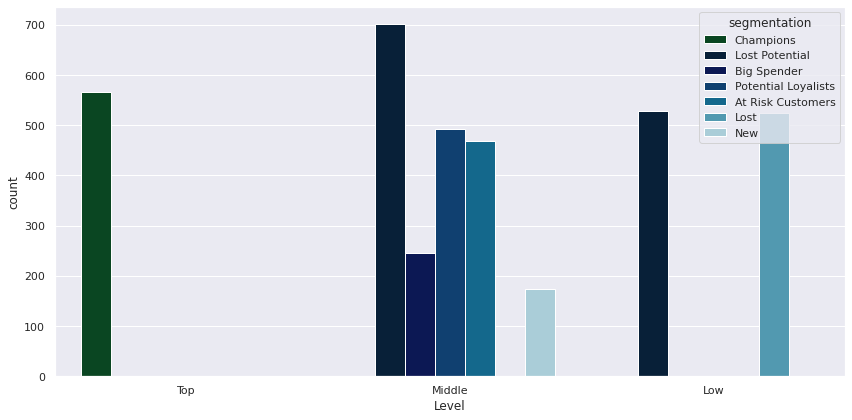

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Level', hue='segmentation', data=rfm, palette = 'ocean')
plt.tight_layout()
plt.show()

## Data Preprocessing

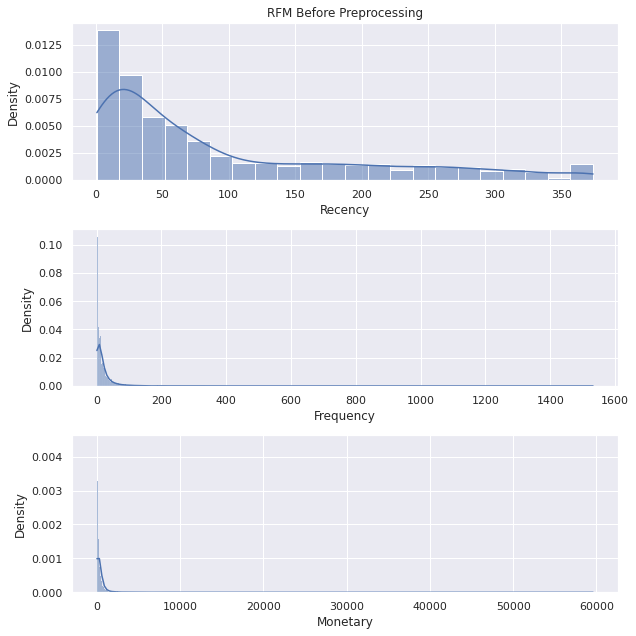

In [ ]:
# distribution of RFM before scaling
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
sns.histplot(rfm['Recency'], kde=True, stat="density")
plt.title('RFM Before Preprocessing')

plt.subplot(3, 1, 2)
sns.histplot(rfm['Frequency'], kde=True, stat="density")

plt.subplot(3, 1, 3)
sns.histplot(rfm['Monetary'], kde=True, stat="density")

plt.tight_layout()
plt.show()

In [ ]:
# scaling
df_rfm = rfm[['Recency', 'Frequency', 'Monetary']]
df_log = np.log(df_rfm)


scaler = StandardScaler()
df_scaled = scaler.fit(df_log)

df_scaled = scaler.transform(df_log)
df_scaled = pd.DataFrame(data=df_scaled, index=df_rfm.index, 
                                   columns=df_rfm.columns)

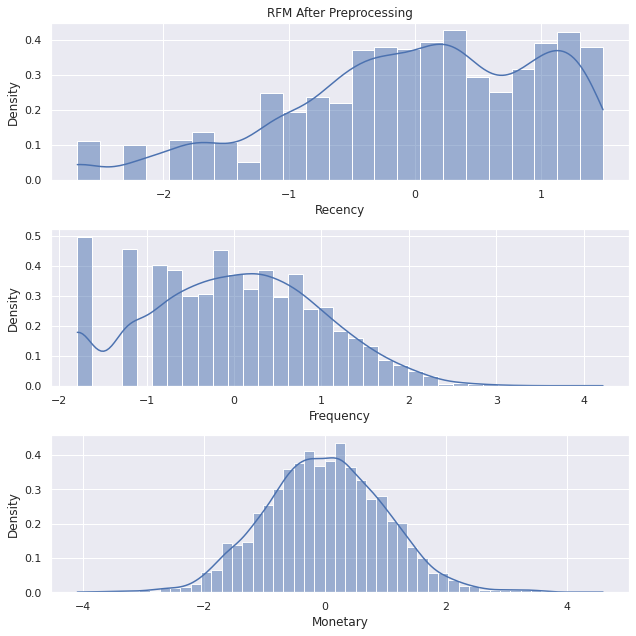

In [ ]:
# distribution of RFM before scaling
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
sns.histplot(df_scaled['Recency'], kde=True, stat="density")
plt.title('RFM After Preprocessing')


plt.subplot(3, 1, 2)
sns.histplot(df_scaled['Frequency'], kde=True, stat="density")

plt.subplot(3, 1, 3)
sns.histplot(df_scaled['Monetary'], kde=True, stat="density")

plt.tight_layout()
plt.show()

## K-mean for clustering
* find the best k for clustering

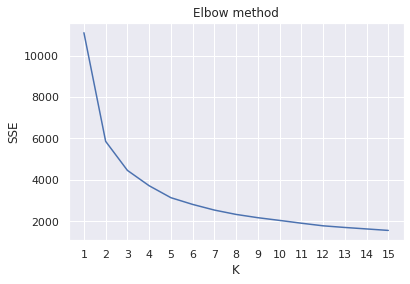

In [ ]:
# Elbow method

# kwargs = {'init' : 'k-means++',
#          'n_init' : 10,
#          'max_iter' : 100,
#          'random_state' : 42}

sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    
    
# plot
plt.plot(range(1,16), sse)
plt.xticks(range(1, 16))
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow method')
plt.show()

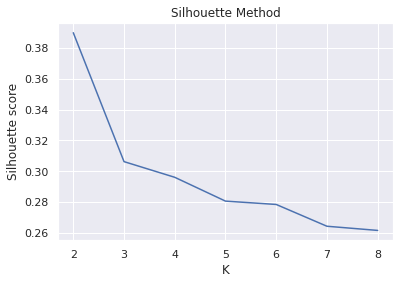

In [ ]:
# Silhoutte analisis
clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    #silhouette score
    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels, metric = 'euclidean'))
    
plt.plot(clusters,silhouette_avg)
plt.xlabel('K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit_transform(df_scaled)

array([[1.08581285, 4.27837762, 2.75145716],
       [3.612524  , 7.16783532, 5.42892364],
       [0.54718562, 4.00614594, 2.37394814],
       ...,
       [3.29707608, 1.95284049, 2.31808193],
       [1.3043711 , 4.53118136, 2.89304694],
       [1.41866636, 2.40654337, 0.70036777]])

In [ ]:
# pusat centroid
print(kmeans.cluster_centers_)

[[-1.20174718  1.15498888  1.1210694 ]
 [ 0.71694457 -1.03934944 -0.97135109]
 [ 0.09203749  0.1753472   0.14197606]]


In [ ]:
df_scaled['cluster'] = kmeans.labels_
df_scaled.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.482882,0
12748,-2.684553,3.845050,3.022433,0
12749,-1.706731,1.168000,1.331390,0
12820,-1.909647,0.530005,0.487337,0
12822,0.322128,0.008268,0.026297,2


### Plot 3d for cluster

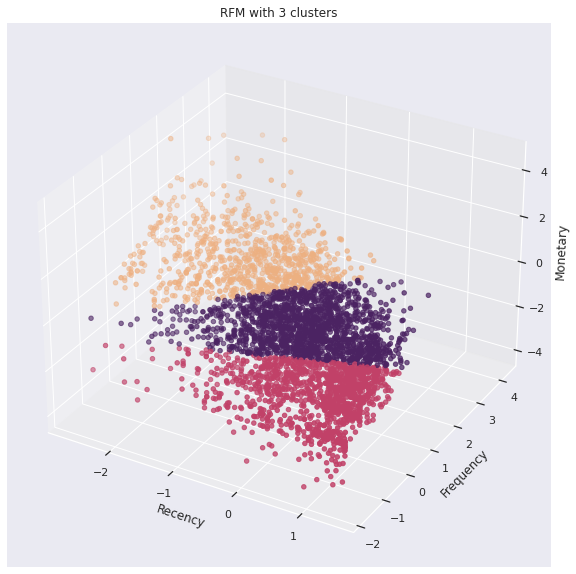

In [ ]:
# Create the figure
fig = plt.figure(figsize  = (10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = np.array(df_scaled['Recency'])
y_vals = np.array(df_scaled['Frequency'])
z_vals = np.array(df_scaled['Monetary'])

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = df_scaled['cluster'], marker='o', cmap='flare')
ax.set_title('RFM with 3 clusters')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [ ]:
data = pd.DataFrame(df_scaled, columns=['Recency', 'Frequency', 'Monetary'])

data['cluster'] = df_scaled['cluster']
# Melt the normalized dataset and reset the index
data_melt = pd.melt(data.reset_index(), 
                    id_vars=['CustomerID', 'cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'],                        
                    var_name='Metric', value_name='Value')

data_melt.head()

,CustomerID,cluster,Metric,Value
0,12747,0,Recency,-2.195642
1,12748,0,Recency,-2.684553
2,12749,0,Recency,-1.706731
3,12820,0,Recency,-1.909647
4,12822,2,Recency,0.322128


### Snake plot

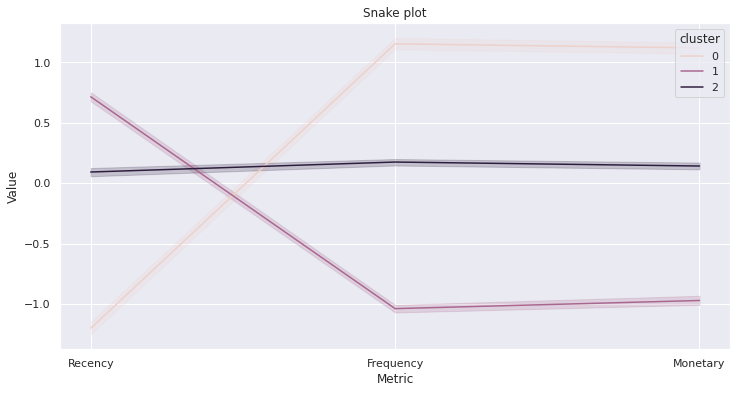

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Metric', y = 'Value', hue='cluster', data=data_melt)
plt.title('Snake plot')
plt.show()

## Summary

| Segmentation | Total Customers| Description |
| :- | -: | :-: |
| Champions | 566 |Best customers, who bought most recently, most often, and are heavy spenders. 
| Big Spander | 245 | Customers who spend big amount.
| Potential Loyalists | 492 |Our recent customers with average frequency and who spent a good amount.
| New | 174 | Customers who have a high overall RFM score but are not frequent shoppers. 
| At Risk Customers | 469 |Customers who purchased often and spent big amounts, but haven’t purchased recently. 
| Lost Potential |1230 | Customers who used to visit and purchase quite often, but haven’t been visiting recently.
| Lost  | 525 |Customers who haven't made a purchase for a long time, only make a one-time transaction and spend less.